# Model Selection

The AI algorithms selected to investigate the CL estimation capabilities on the data sourced from the two wearables(Empatica and Samsung) are:

- SVM
  - Sigmoid kernel
    - recommended because ...
-


Empatica Model Accuracy: 0.24732620320855614
Samsung Model Accuracy: 0.5106951871657754

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.33      0.49      0.40       374

    accuracy                           0.25       748
   macro avg       0.17      0.25      0.20       748
weighted avg       0.17      0.25      0.20       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.51      1.00      0.67       374
           1       1.00      0.02      0.04       374

    accuracy                           0.51       748
   macro avg       0.75      0.51      0.36       748
weighted avg       0.75      0.51      0.36       748


Confusion Matrix (Empatica Model):
 [[  0 374]
 [189 185]]

Confusion Matrix (Samsung Model):
 [[374   0]
 [366   8]]


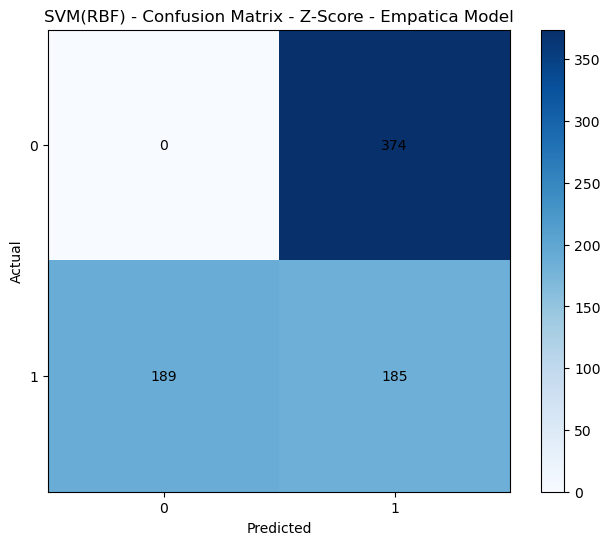

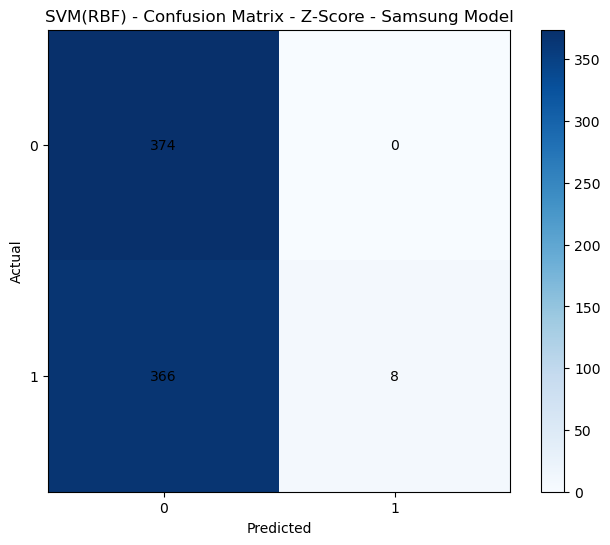

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="rbf", random_state=42)
model_samsung = SVC(kernel="rbf", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(RBF) - Confusion Matrix - Z-Score - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(RBF) - Confusion Matrix - Z-Score - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5
Samsung Model Accuracy: 0.5106951871657754

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.25      0.50      0.33       748
weighted avg       0.25      0.50      0.33       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.51      1.00      0.67       374
           1       1.00      0.02      0.04       374

    accuracy                           0.51       748
   macro avg       0.75      0.51      0.36       748
weighted avg       0.75      0.51      0.36       748


Confusion Matrix (Empatica Model):
 [[  0 374]
 [  0 374]]

Confusion Matrix (Samsung Model):
 [[374   0]
 [366   8]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


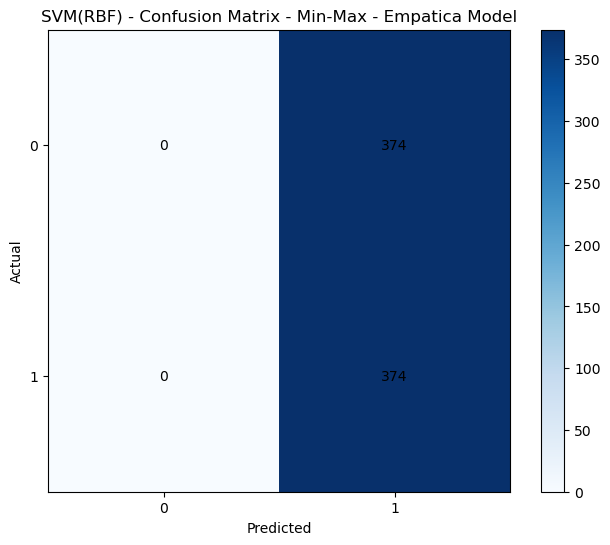

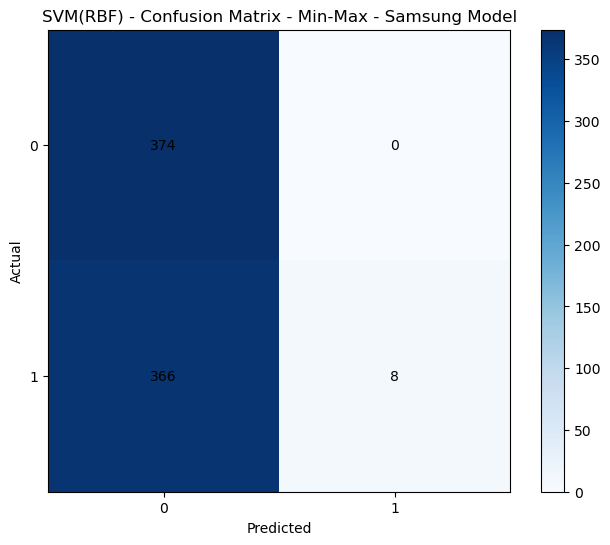

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="rbf", random_state=42)
model_samsung = SVC(kernel="rbf", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(RBF) - Confusion Matrix - Min-Max - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(RBF) - Confusion Matrix - Min-Max - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.982620320855615
Samsung Model Accuracy: 0.5655080213903744

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       374
           1       1.00      0.97      0.98       374

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.54      0.84      0.66       374
           1       0.64      0.29      0.40       374

    accuracy                           0.57       748
   macro avg       0.59      0.57      0.53       748
weighted avg       0.59      0.57      0.53       748


Confusion Matrix (Empatica Model):
 [[374   0]
 [ 13 361]]

Confusion Matrix (Samsung Model):
 [[314  60]
 [265 109]]


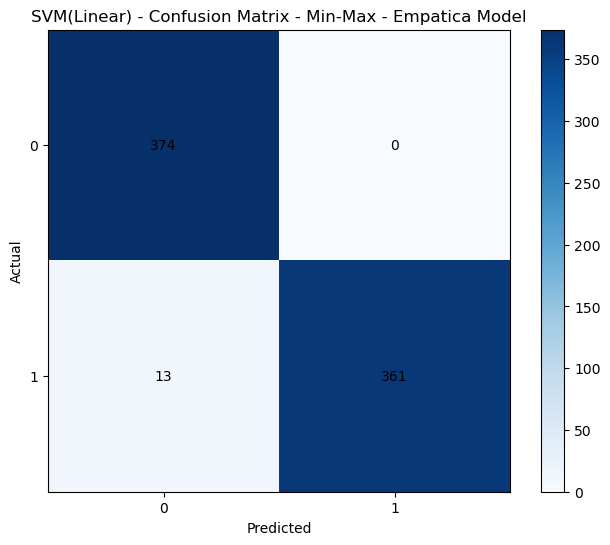

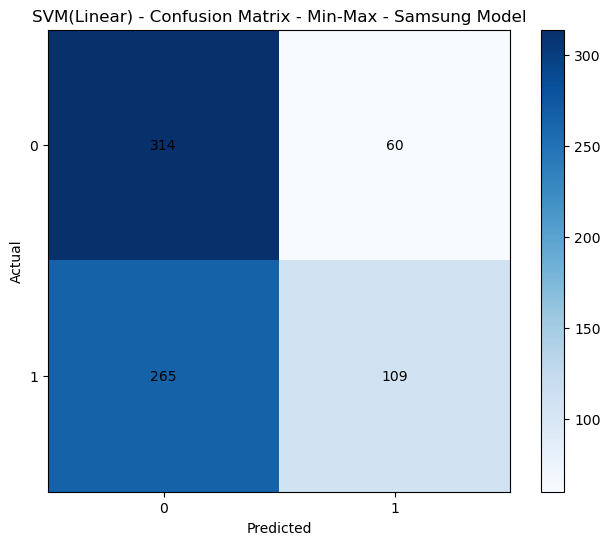

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="linear", random_state=42)
model_samsung = SVC(kernel="linear", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Linear) - Confusion Matrix - Min-Max - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Linear) - Confusion Matrix - Min-Max - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.9665775401069518
Samsung Model Accuracy: 0.5641711229946524

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       374
           1       1.00      0.93      0.97       374

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.54      0.84      0.66       374
           1       0.64      0.29      0.40       374

    accuracy                           0.56       748
   macro avg       0.59      0.56      0.53       748
weighted avg       0.59      0.56      0.53       748


Confusion Matrix (Empatica Model):
 [[374   0]
 [ 25 349]]

Confusion Matrix (Samsung Model):
 [[315  59]
 [267 107]]


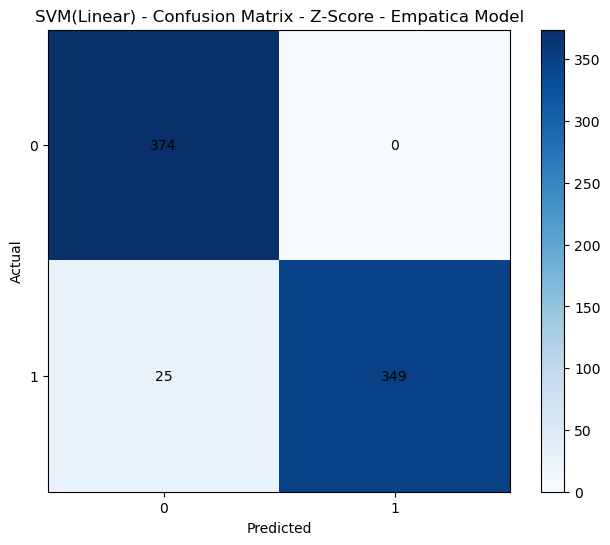

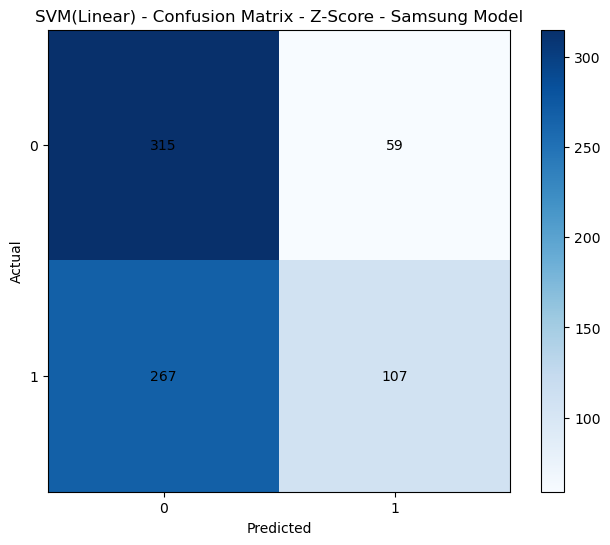

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="linear", random_state=42)
model_samsung = SVC(kernel="linear", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Linear) - Confusion Matrix - Z-Score - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Linear) - Confusion Matrix - Z-Score - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5
Samsung Model Accuracy: 0.410427807486631

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.25      0.50      0.33       748
weighted avg       0.25      0.50      0.33       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.34      0.19      0.24       374
           1       0.44      0.63      0.52       374

    accuracy                           0.41       748
   macro avg       0.39      0.41      0.38       748
weighted avg       0.39      0.41      0.38       748


Confusion Matrix (Empatica Model):
 [[  0 374]
 [  0 374]]

Confusion Matrix (Samsung Model):
 [[ 71 303]
 [138 236]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


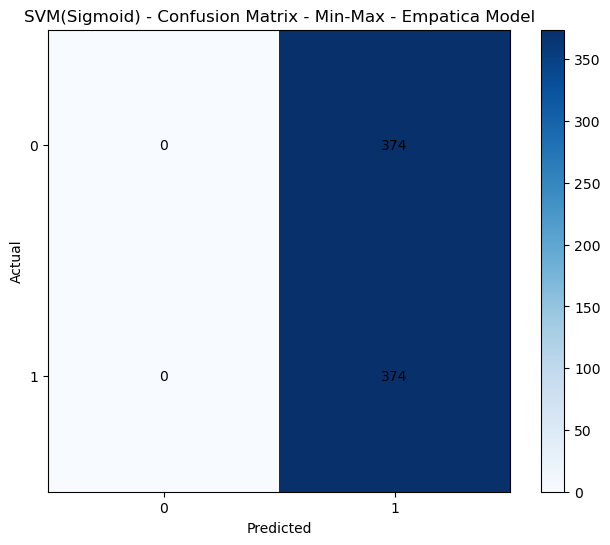

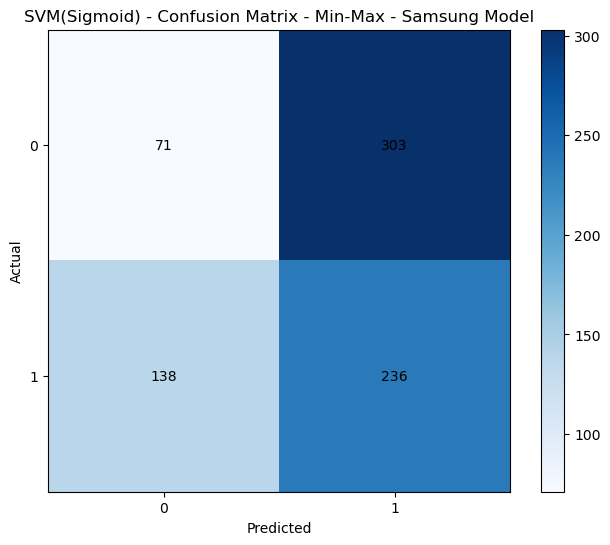

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="sigmoid", random_state=42)
model_samsung = SVC(kernel="sigmoid", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Min-Max - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Min-Max - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5200534759358288
Samsung Model Accuracy: 0.589572192513369

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       374
           1       1.00      0.04      0.08       374

    accuracy                           0.52       748
   macro avg       0.76      0.52      0.38       748
weighted avg       0.76      0.52      0.38       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.56      0.80      0.66       374
           1       0.65      0.38      0.48       374

    accuracy                           0.59       748
   macro avg       0.61      0.59      0.57       748
weighted avg       0.61      0.59      0.57       748


Confusion Matrix (Empatica Model):
 [[374   0]
 [359  15]]

Confusion Matrix (Samsung Model):
 [[298  76]
 [231 143]]


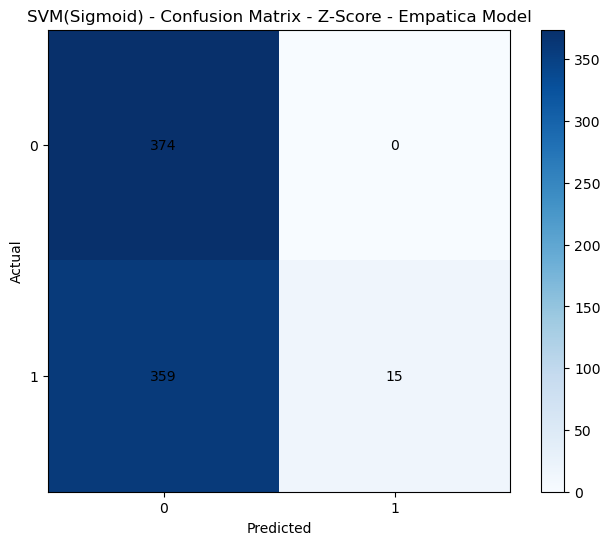

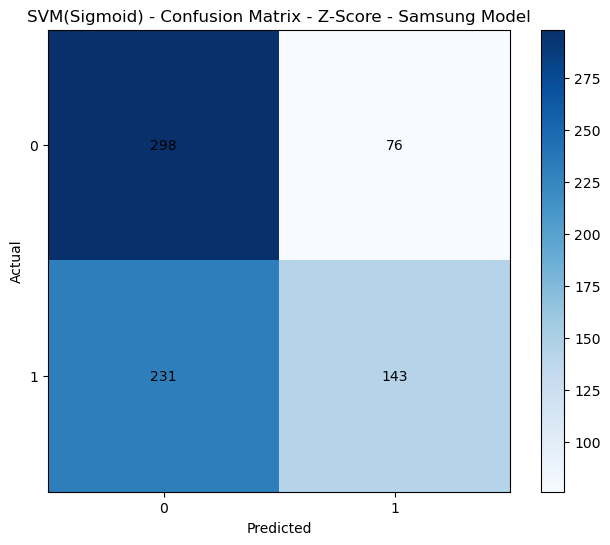

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="sigmoid", random_state=42)
model_samsung = SVC(kernel="sigmoid", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Z-Score - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Z-Score - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.4037433155080214
Samsung Model Accuracy: 0.5882352941176471

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.45      0.81      0.58       374

    accuracy                           0.40       748
   macro avg       0.22      0.40      0.29       748
weighted avg       0.22      0.40      0.29       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.60      0.55      0.57       374
           1       0.58      0.63      0.60       374

    accuracy                           0.59       748
   macro avg       0.59      0.59      0.59       748
weighted avg       0.59      0.59      0.59       748


Confusion Matrix (Empatica Model):
 [[  0 374]
 [ 72 302]]

Confusion Matrix (Samsung Model):
 [[205 169]
 [139 235]]


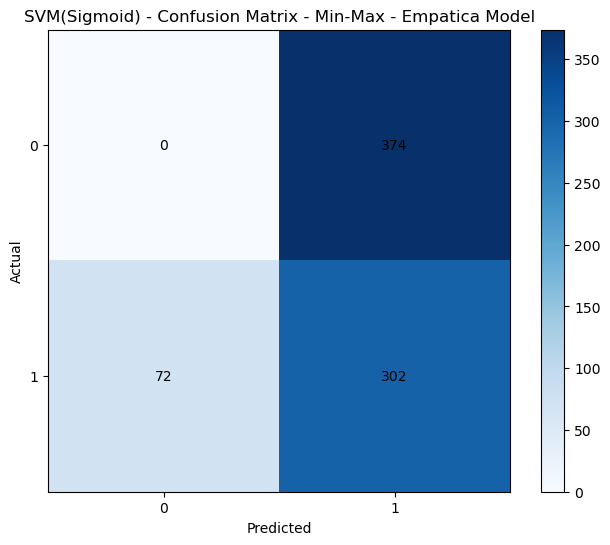

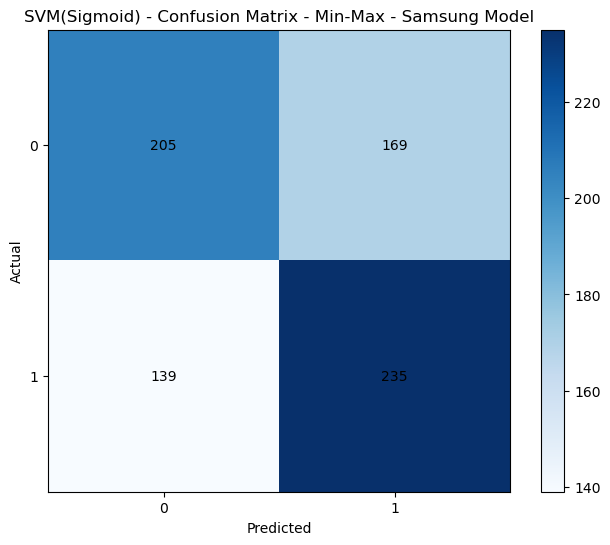

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="poly", random_state=42)
model_samsung = SVC(kernel="poly", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Min-Max - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Sigmoid) - Confusion Matrix - Min-Max - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5
Samsung Model Accuracy: 0.5187165775401069

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.25      0.50      0.33       748
weighted avg       0.25      0.50      0.33       748


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       374
           1       1.00      0.04      0.07       374

    accuracy                           0.52       748
   macro avg       0.75      0.52      0.37       748
weighted avg       0.75      0.52      0.37       748


Confusion Matrix (Empatica Model):
 [[  0 374]
 [  0 374]]

Confusion Matrix (Samsung Model):
 [[374   0]
 [360  14]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


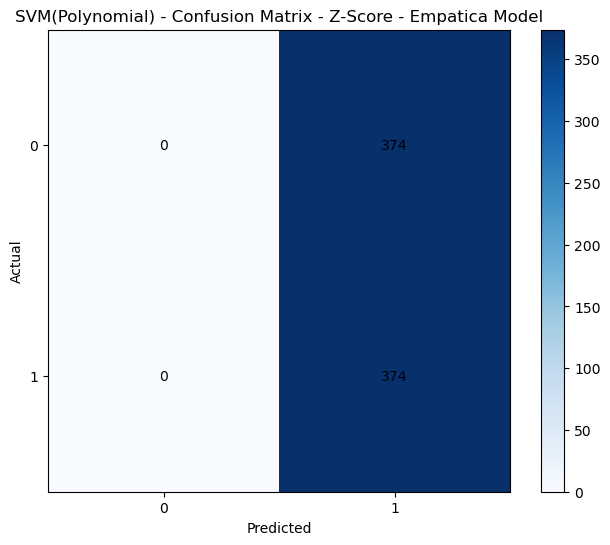

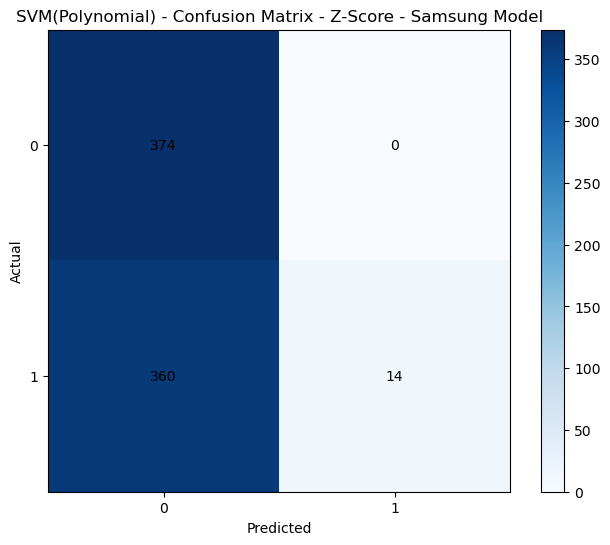

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="poly", random_state=42)
model_samsung = SVC(kernel="poly", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("SVM(Polynomial) - Confusion Matrix - Z-Score - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("SVM(Polynomial) - Confusion Matrix - Z-Score - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()